2.Half Space classifier implemented using Perceptron Algorithm (implement the iterations)

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:

breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.shape

(569, 31)

In [ ]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [ ]:
data.describe()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


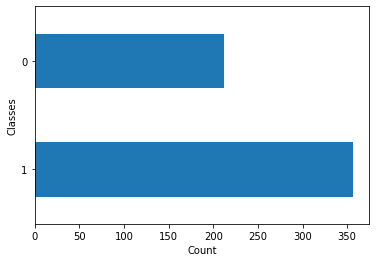

In [ ]:

data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()



In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)




In [ ]:

class Perceptron:
  
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    #print('x',x)
    #print('w',self.w)
    #print('b',self.b)
    #print(self.w)
    return 1 if ((np.dot(self.w,x)) >= self.b) else 0
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    X=np.array(X)
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs, lr):
    self.w = np.ones(X.shape[1])

    
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      X=np.array(X)
      Y=np.array(Y)
      for x, y in zip(X, Y):
        #print('x',x)
        #print('y',y)
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb
        
    #print('m',max_accuracy)
    #plot the accuracy values over epochs
    accu=list(accuracy.values())
    plt.plot(list(accu))
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.show()
    print(type(wt_matrix))
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)


test_size = 30.0


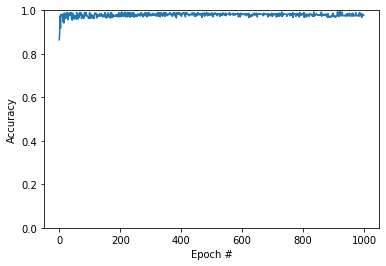

<class 'list'>
0.9532163742690059
test_size = 20.0


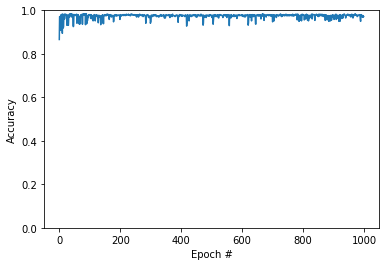

<class 'list'>
0.9824561403508771
test_size = 10.0


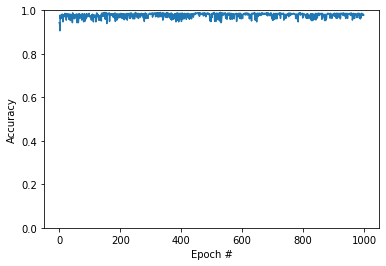

<class 'list'>
0.9649122807017544


In [ ]:
#train test split.
test_len=[0.3,0.2,0.1]
for t in test_len:
  print('test_size =', t*100)
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = t, stratify = Y, random_state = 1)


  perceptron = Perceptron()


  wt_matrix = perceptron.fit(X_train, Y_train, 1000, 0.3)
  Y_pred_test = perceptron.predict(X_test)
  
  print(accuracy_score(Y_pred_test, Y_test))



In [ ]:
########################################################################################################

3.Logistic Regression Classifier

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

breast_cancer = sklearn.datasets.load_breast_cancer()


data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)




In [ ]:

from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def __init__ (self):
      self.w = None
      self.b = None
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        print(X.shape)
        print(weights.shape)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs, lr):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        
        z = dot(X, self.weights)
        
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]


In [ ]:
#train test split.
test_len=[0.3,0.2,0.1]
for t in test_len:
  print('test_size =', t*100)
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = t, stratify = Y, random_state = 1)


  Logistic = LogisticRegression()


  wt_matrix = Logistic.fit(X_train, Y_train, 1000, 0.3)
 
  Y_pred_test = Logistic.predict(X_test)
  
  print(accuracy_score(Y_pred_test, Y_test))


Streaming output truncated to the last 5000 lines.
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)
(398, 30)
(30,)

In [ ]:
###########################################################################

1.Half Space classifier implemented using LP solver 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
X=pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X['Age']=X['Age'].fillna(X['Age'].mode()[0])
X['Cabin']=X['Cabin'].fillna(X['Cabin'].mode()[0])
X['Embarked']=X['Embarked'].fillna(X['Embarked'].mode()[0])
print(X.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
X=X.drop('Name',axis=1)
X=X.drop('Ticket',axis=1)
X=X.drop('Cabin',axis=1)







In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X['Embarked']=le.fit_transform(X['Embarked'])
X['Sex']=le.fit_transform(X['Sex'])


In [ ]:
for i in train['Survived']:
  X['new']=np.where(X['Survived']==i,-1,1)

In [ ]:
y=X['Survived']
x=X.drop(['Survived'],axis=1)

In [ ]:
mnscaler = MinMaxScaler()
x = mnscaler.fit_transform(x)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)



In [ ]:
X_train.shape

(712, 9)

In [ ]:
X_test.shape

(179, 9)

In [ ]:
xy=np.array(Y_train.values.reshape(-1,1)*X_train)

In [ ]:
b=np.repeat(-1,xy.shape[0]).reshape(-1,1)

In [ ]:
c=np.repeat(0,xy.shape[1])

In [ ]:
from scipy.optimize import linprog

xb=(None,None)
res = linprog(c, A_ub=-xy, b_ub=b, bounds=xb,
              options={"disp": True})

The problem is (trivially) infeasible due to a row of zeros in the equality constraint matrix with a nonzero corresponding  constraint value.
         Iterations: 0


In [ ]:
print(res)

     con: array([], dtype=float64)
     fun: 0.0
 message: 'The problem is (trivially) infeasible due to a row of zeros in the equality constraint matrix with a nonzero corresponding  constraint value.'
     nit: 0
   slack: array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.

In [ ]:
x=[  23.07021475,   45.57309192,   24.30850787,   97.05184713,
         29.37563611,   18.29524555,   86.22268219,   20.23837334,
       -233.36516675]

In [ ]:
x=np.array(x)

In [ ]:
x.shape

(9,)

In [ ]:
X_test.shape

(179, 9)

In [ ]:
predict = np.sign(np.matmul(X_test, res.x))
print("Prediction: \n", predict)

Prediction: 
 [ 1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.
  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.
  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.
  1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.
 -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.
  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.
  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.]


In [ ]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(Y_test, predict))

Accuracy: 0.0


In [ ]:

from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = train.drop("Survived", axis = 1)
Y = train["Survived"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=train.drop("Survived",axis = 1).columns)






X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

In [ ]:
X_test.shape

(90, 9)

In [ ]:
X_train.shape

(801, 9)

In [ ]:
w.shape

(9,)

In [ ]:
y_=dot(X_test, w)

In [ ]:
y_.shape

(90,)

In [ ]:
Y_test.shape

(90,)

In [ ]:
y_=list(y_)

In [ ]:
y_pred=[]
for i in y_:
  if i>=0:
    y_pred.append(1)
  else:
    y_pred.append(-1)


In [ ]:
y_act=[]
for i in y:
  if i==0:
    y_act.append(-1)
  else:
    y_act.append(1)


[-1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,

In [ ]:
###################################################################

In [ ]:
import pandas as pd
X=pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:
X['Age']=X['Age'].fillna(X['Age'].mode()[0])
X['Cabin']=X['Cabin'].fillna(X['Cabin'].mode()[0])
X['Embarked']=['Embarked'].fillna(train['Embarked'].mode()[0])




print(train.isnull().sum())